### A Macro-economic Model:

- production equals aggregate demand, $Y = C + I +G$; 

- consumption function, $C = \bar C + c(Y−T)+s*r$; 

- investment function, $I = \bar I + b*r$; 


- public spending function, $G = \bar G$; 

- income taxes function, $T = \bar T$; 

- monetary equilibrium, $M/P = kY − hr$; 

- money supply function, $M = \bar M$.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import scipy.linalg

In [3]:
c = 0.7037 #marginal propensity to consume 
s = -12.7511 #sensitivity of consumption to the interest rate
b = -76.4034 #sensitivity of investment to the interest rate
k, h = .6, 2700
Gbar, Cbar, Ibar, Tbar, Mbar, Pbar = 150, 55, 200, 150, 200, 1
#Endogenous variables: Y (output), C (consumption), I (investment), r (interest rate)
# Matrix for [Y, C, I, r]
A = np.array([[1, -1, -1, 0],# Y=C+I+G 
             [-c, 1, 0, -s],  # C=C_bar+c(Y−T)+sr
             [0, 0, 1, -b],   # I=I_bar+br 
             [k, 0, 0, -h]]) # M/P=kY−hr
# x = [Y,C,I,r] , vector of the endogenous variables 
# d, vector of the exogenous variables 
d = np.array([ Gbar , Cbar - c*Tbar , Ibar , Mbar/Pbar ] )
#Compute the endogenous variables 
P, L ,U = scipy.linalg.lu(A) # LU factorization
x = scipy.linalg.inv(U)@(scipy.linalg.inv(L)@ P@d) # solution of the linear system
# x = [Y,C,I,r] , vector of the endogeneous variables 
print(" IS-LM model: closed economy \
      \n-----------------------------------------------------------\
      \nexogenous variables: \nG = 200; T = 110; M = 200; P = 1     \
      \nproduction, Y = {0:.2f}，\
      \nconsumption, C = {1:.2f}, \
      \ninvestment, I = {2:.2f}，\
      \ninterest rate (%), r = {3:.2f}".format(x[0],x[1],x[2],x[3]*100  ))


 IS-LM model: closed economy       
-----------------------------------------------------------      
exogenous variables: 
G = 200; T = 110; M = 200; P = 1           
production, Y = 968.17，      
consumption, C = 628.94,       
investment, I = 189.22，      
interest rate (%), r = 14.11


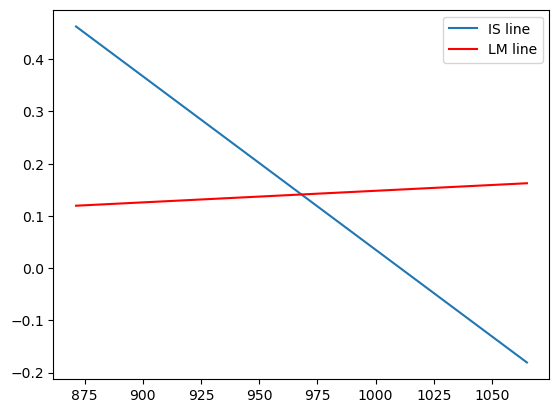

In [4]:
#Plot the solution: IS−LM diagram (r against Y) 
#Generate a grid on Y; in this case, since all curves are lines, only 2 points would have been enough 
Y = np.linspace(0.90*x[0],1.1*x[0], num=100)  
# I=Y-C-G , I=Ibar+br , C=Cbar+c*(Y-Tbar)+s*r
# Ibar+br=Y-(Cbar+c*(Y-Tbar)+s*r)-Gbar
# br+sr=Y-Ibar-Gbar-Cbar-c*(Y-Tbar)
IS=(Y-Ibar-Gbar-Cbar-c*(Y-Tbar))/(b+s)
# LM: M_bar/P_bar=kY−hr expressed in terms of r
LM = ( k*Y-Mbar/Pbar )/h
plt.figure(num=1)
#plt.figure(num=10)
l1 = plt.plot(Y, IS, label='IS line')
l2 = plt.plot(Y, LM,  color='red', linestyle='-', label='LM line')
plt.legend();

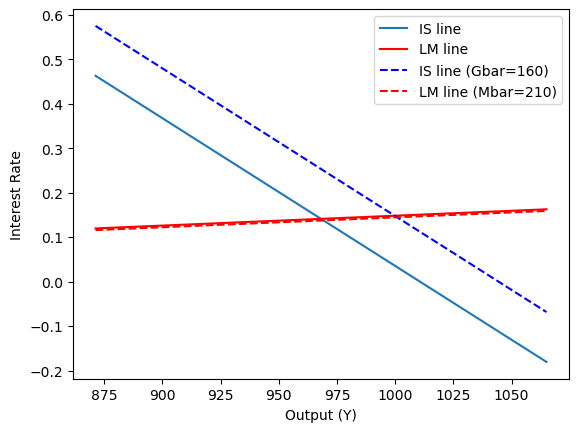

 IS-LM model: closed economy       
-----------------------------------------------------------      
exogenous variables: 
G = 160; T = 150; M = 2100; P = 1           
production, Y = 1000.85，      
consumption, C = 651.90,       
investment, I = 188.95，      
interest rate (%), r = 14.46


In [5]:
c = 0.7037  # marginal propensity to consume
s = -12.7511  # sensitivity of consumption to the interest rate
b = -76.4034  # sensitivity of investment to the interest rate
k, h = 0.6, 2700
Gbar, Cbar, Ibar, Tbar, Mbar, Pbar = 150, 55, 200, 150, 200, 1
# Matrix for [Y, C, I, r]
A = np.array([[1, -1, -1, 0],  # Y=C+I+G
              [-c, 1, 0, -s],  # C=C_bar+c(Y−T)+sr
              [0, 0, 1, -b],    # I=I_bar+br
              [k, 0, 0, -h]])  # M/P=kY−hr
# Vector of exogenous variables
d = np.array([Gbar, Cbar - c * Tbar, Ibar, Mbar / Pbar])
# Compute the endogenous variables
P, L, U = scipy.linalg.lu(A)  # LU factorization
x = scipy.linalg.inv(U) @ (scipy.linalg.inv(L) @ P @ d)  # solution of the linear system
# Plot the solution: IS−LM diagram (r against Y)
# Generate a grid on Y; in this case, since all curves are lines, only 2 points would have been enough
Y = np.linspace(0.90 * x[0], 1.1 * x[0], num=100)
# IS and LM equations for the original values
IS = (Y - Ibar - Gbar - Cbar - c * (Y - Tbar)) / (b + s)
LM = (k * Y - Mbar / Pbar) / h
# Plot the original IS and LM lines
plt.figure(num=1)
l1 = plt.plot(Y, IS, label='IS line')
l2 = plt.plot(Y, LM, color='red', linestyle='-', label='LM line')
# New values of Gbar and Mbar
Gbar_new, Mbar_new = 160, 210
d_new = np.array([Gbar_new, Cbar - c * Tbar, Ibar, Mbar_new / Pbar])
x_new = scipy.linalg.inv(U) @ (scipy.linalg.inv(L) @ P @ d_new)
IS_new = (Y - Ibar - Gbar_new - Cbar - c * (Y - Tbar)) / (b + s)
LM_new = (k * Y - Mbar_new / Pbar) / h
l3 = plt.plot(Y, IS_new, color='blue', linestyle='--', label='IS line (Gbar=160)')
l4 = plt.plot(Y, LM_new, color='red', linestyle='--', label='LM line (Mbar=210)')
# Add labels and legend
plt.xlabel('Output (Y)')
plt.ylabel('Interest Rate')
plt.legend()
# Show the plot
plt.show()
print(" IS-LM model: closed economy \
      \n-----------------------------------------------------------\
      \nexogenous variables: \nG = 160; T = 150; M = 2100; P = 1     \
      \nproduction, Y = {0:.2f}，\
      \nconsumption, C = {1:.2f}, \
      \ninvestment, I = {2:.2f}，\
      \ninterest rate (%), r = {3:.2f}".format(x_new[0],x_new[1],x_new[2],x_new[3]*100  ))

In [6]:
c = 0.7037  # marginal propensity to consume
s = -12.7511  # sensitivity of consumption to the interest rate
b = -76.4034  # sensitivity of investment to the interest rate
k, h = 0.6, 2700
Gbar, Cbar, Ibar, Tbar, Mbar, Pbar = 150, 55, 200, 150, 200, 1
# Matrix for [Y, C, I, r]
A = np.array([[1, -1, -1, 0],  # Y=C+I+G
              [-c, 1, 0, -s],  # C=C_bar+c(Y−T)+sr
              [0, 0, 1, -b],    # I=I_bar+br
              [k, 0, 0, -h]])  # M/P=kY−hr
# Vector of exogenous variables
d = np.array([Gbar, Cbar - c * Tbar, Ibar, Mbar / Pbar])
# Compute the endogenous variables
P, L, U = scipy.linalg.lu(A)  # LU factorization
x = scipy.linalg.inv(U) @ (scipy.linalg.inv(L) @ P @ d)  # solution of the linear system
# IS and LM equations for the original values
IS = (Y - Ibar - Gbar - Cbar - c * (Y - Tbar)) / (b + s)
LM = (k * Y - Mbar / Pbar) / h


In [7]:
c = 0.7037  # marginal propensity to consume
s = -12.7511  # sensitivity of consumption to the interest rate
b = -76.4034  # sensitivity of investment to the interest rate
k, h , q = 0.6, 2700, 0.19
Gbar, Cbar, Ibar_guess, Tbar, Mbar, Pbar = 150, 55, 200, 150, 200, 1
# Matrix for [Y, C, I, r]
A = np.array([[1, -1, -1, 0],  # Y=C+I+G
              [-c, 1, 0, -s],  # C=C_bar+c(Y−T)+sr
              [0, 0, 1, -b],    # I=I_bar+br
              [k, 0, 0, -h]])  # M/P=kY−hr
# Vector of exogenous variables
d = np.array([Gbar, Cbar - c * Tbar, Ibar_guess, Mbar / Pbar])
# LU factorization
P, L, U = scipy.linalg.lu(A)
# Solution of the linear system
x = scipy.linalg.inv(U) @ (scipy.linalg.inv(L) @ P @ d)
# Set the target Investment/GDP ratio (20%)
target_investment_ratio = 0.20
a, b = 100, 300  # Initial bounds for Ibar
tolerance = 1e-8
max_iterations = 100
for i in range(max_iterations):
    Ibar = (a + b) / 2
    d[2] = Ibar
    x = scipy.linalg.inv(U) @ (scipy.linalg.inv(L) @ P @ d)
    investment_ratio = x[2] / x[0]
    if abs(investment_ratio - target_investment_ratio) < tolerance or (b - a) / 2 < tolerance:
        break
    elif investment_ratio < target_investment_ratio:
        a = Ibar
    else:
        b = Ibar
# Print the result
print("Ibar that delivers an Investment/GDP ratio of 20%: {:.2f}".format(Ibar))
# Update the investment equation for the final Ibar
A[2, 2] = 1
d[2] = Ibar
# Recompute the endogenous variables with the final Ibar
x = scipy.linalg.inv(U) @ (scipy.linalg.inv(L) @ P @ d)
# Print the results
print("\nIS-LM model with modified investment equation: \
      \n-----------------------------------------------------------\
      \nexogenous variables: \nG = 200; T = 110; M = 200; P = 1     \
      \nproduction, Y = {0:.2f}，\
      \nconsumption, C = {1:.2f}, \
      \ninvestment, I = {2:.2f}，\
      \ninterest rate (%), r = {3:.2f}".format(x[0], x[1], x[2], x[3] * 100))


Ibar that delivers an Investment/GDP ratio of 20%: 214.07

IS-LM model with modified investment equation:       
-----------------------------------------------------------      
exogenous variables: 
G = 200; T = 110; M = 200; P = 1           
production, Y = 1012.67，      
consumption, C = 660.14,       
investment, I = 202.53，      
interest rate (%), r = 15.10
